In [2]:
import requests
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


In [3]:
ls


 PriscillaDay3AM.ipynb             Priscilla - exploring Regex.ipynb
David.ipynb                        Priscilla -API fetching .ipynb
Davis-Pris API.ipynb               Untitled.ipynb
Pris-  exploring actors.ipynb      Untitled1.ipynb
Pris- exploring genres.ipynb       renato_call_data.ipynb


In [6]:
full_data_merged = pd.read_csv("./../raw_data/merged_movies_by_index.csv")
full_data_merged

,avg_review_score,n_reviews,year,title,Title,Year,Rated,Released,Runtime,Genre,...,Response,Internet Movie Database,Index_match,DVD,BoxOffice,Production,Website,Rotten Tomatoes,Metacritic,Ratings
0,3.749543,547,2003,Dinosaur Planet,Dinosaur Planet,2003,NaN,14 Dec 2003,50 min,"Documentary, Animation, Family",...,True,7.7/10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.641153,2012,1997,Character,Character,1997,R,27 Mar 1998,122 min,"Crime, Drama, Mystery",...,True,7.7/10,3,04 Feb 2003,"$623,983",Almerica Film,NaN,92%,NaN,NaN
2,3.084396,1019,1997,Sick,Sick,1997,Not Rated,07 Nov 1997,90 min,Documentary,...,True,7.5/10,6,15 Feb 2017,"$116,806",Sick-the Life and Death of Bob Flanagan-Superm...,NaN,91%,82/100,NaN
3,2.129032,93,1992,8 Man,8 Man,1992,NaN,NaN,83 min,"Action, Sci-Fi",...,True,5.4/10,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.417582,546,1947,My Favorite Brunette,My Favorite Brunette,1947,Passed,04 Apr 1947,87 min,"Comedy, Crime, Mystery, Romance, Thriller",...,True,6.8/10,12,10 Mar 2016,NaN,"Paramount Pictures, Hope Enterprises",NaN,75%,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10381,3.411855,1957,1978,Interiors,Interiors,1978,PG,06 Oct 1978,92 min,Drama,...,True,7.4/10,17763,02 Feb 2017,"$10,432,366",Rollins-Joffe Productions,NaN,79%,67/100,NaN
10382,3.867112,64957,1998,Shakespeare in Love,Shakespeare in Love,1998,R,08 Jan 1999,123 min,"Comedy, Drama, History, Romance",...,True,7.1/10,17764,21 Apr 2016,"$100,317,794","Miramax Films, Bedford Falls Productions, Univ...",NaN,92%,87/100,NaN
10383,2.839207,1362,2000,Epoch,Epoch,2001,PG-13,24 Nov 2001,96 min,"Sci-Fi, Thriller",...,True,5.0/10,17768,25 Jan 2017,NaN,Metro-Goldwyn-Mayer,NaN,16%,NaN,NaN
10384,2.498592,6749,2003,The Company,The Company,2003,PG-13,20 May 2004,112 min,"Drama, Music, Romance",...,True,6.3/10,17769,16 Apr 2012,"$2,283,914","First Snow Production, Capitol Films, Sandcast...",NaN,72%,73/100,NaN


In [8]:
full_data_merged.columns


Index(['avg_review_score', 'n_reviews', 'year', 'title', 'Title', 'Year',
       'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors',
       'Plot', 'Language', 'Country', 'Awards', 'Poster', 'Metascore',
       'imdbRating', 'imdbVotes', 'imdbID', 'Type', 'totalSeasons', 'Response',
       'Internet Movie Database', 'Index_match', 'DVD', 'BoxOffice',
       'Production', 'Website', 'Rotten Tomatoes', 'Metacritic', 'Ratings'],
      dtype='object')

In [10]:
full_data_merged.Genre[0]

'Documentary, Animation, Family'

In [44]:
full_data_merged['Genre'] = full_data_merged["Genre"].fillna('N/A')

In [46]:
df = full_data_merged[["Title", "Genre"]].copy()
df

,Title,Genre
0,Dinosaur Planet,"Documentary, Animation, Family"
1,Character,"Crime, Drama, Mystery"
2,Sick,Documentary
3,8 Man,"Action, Sci-Fi"
4,My Favorite Brunette,"Comedy, Crime, Mystery, Romance, Thriller"
...,...,...
10381,Interiors,Drama
10382,Shakespeare in Love,"Comedy, Drama, History, Romance"
10383,Epoch,"Sci-Fi, Thriller"
10384,The Company,"Drama, Music, Romance"


In [47]:
df = full_data_merged[["Title", "Genre"]].copy()

df["genre_list"] = df["Genre"].str.split(", ") #.apply(lambda x : x.split(", "))
df

,Title,Genre,genre_list
0,Dinosaur Planet,"Documentary, Animation, Family","[Documentary, Animation, Family]"
1,Character,"Crime, Drama, Mystery","[Crime, Drama, Mystery]"
2,Sick,Documentary,[Documentary]
3,8 Man,"Action, Sci-Fi","[Action, Sci-Fi]"
4,My Favorite Brunette,"Comedy, Crime, Mystery, Romance, Thriller","[Comedy, Crime, Mystery, Romance, Thriller]"
...,...,...,...
10381,Interiors,Drama,[Drama]
10382,Shakespeare in Love,"Comedy, Drama, History, Romance","[Comedy, Drama, History, Romance]"
10383,Epoch,"Sci-Fi, Thriller","[Sci-Fi, Thriller]"
10384,The Company,"Drama, Music, Romance","[Drama, Music, Romance]"


In [71]:
df_explode = df.explode(column = "genre_list")
df_explode

,Title,Genre,genre_list
0,Dinosaur Planet,"Documentary, Animation, Family",Documentary
0,Dinosaur Planet,"Documentary, Animation, Family",Animation
0,Dinosaur Planet,"Documentary, Animation, Family",Family
1,Character,"Crime, Drama, Mystery",Crime
1,Character,"Crime, Drama, Mystery",Drama
...,...,...,...
10384,The Company,"Drama, Music, Romance",Music
10384,The Company,"Drama, Music, Romance",Romance
10385,Alien Hunter,"Action, Adventure, Sci-Fi",Action
10385,Alien Hunter,"Action, Adventure, Sci-Fi",Adventure


In [72]:
df_explode["genre_proc"] = df_explode["genre_list"].str.lower().str.split(" ").apply(lambda x: " ".join(sorted(x)))

In [74]:
genre_dict = {}
for genre in df_explode["genre_proc"]:
    genre_dict[genre] = genre_dict.get(genre, 0) +1
genre_dict

{'documentary': 943,
 'animation': 571,
 'family': 781,
 'crime': 1631,
 'drama': 5182,
 'mystery': 774,
 'action': 1793,
 'sci-fi': 874,
 'comedy': 3590,
 'romance': 2280,
 'thriller': 1872,
 'music': 751,
 'horror': 993,
 'biography': 512,
 'adventure': 1231,
 'musical': 378,
 'fantasy': 782,
 'war': 443,
 'history': 414,
 'western': 274,
 'short': 105,
 'sport': 289,
 'adult': 11,
 'film-noir': 86,
 'n/a': 35,
 'reality-tv': 15,
 'talk-show': 4,
 'game-show': 3,
 'news': 1}

<AxesSubplot:>

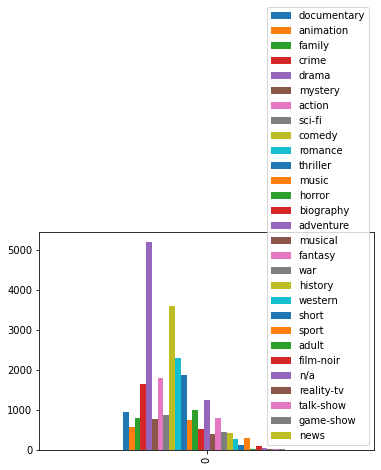

In [70]:
df_genre = pd.DataFrame(genre_dict.values()).T
df_genre.columns=genre_dict.keys()
df_genre.plot(kind="bar")

In [53]:
len(actor_dict.keys())

29

In [54]:
df_explode["freq"] = df_explode["genre_proc"].apply(lambda x: actor_dict[x])

In [55]:
df_explode

,Title,Genre,genre_list,genre_proc,freq
0,Dinosaur Planet,"Documentary, Animation, Family",Documentary,documentary,943
0,Dinosaur Planet,"Documentary, Animation, Family",Animation,animation,571
0,Dinosaur Planet,"Documentary, Animation, Family",Family,family,781
1,Character,"Crime, Drama, Mystery",Crime,crime,1631
1,Character,"Crime, Drama, Mystery",Drama,drama,5182
...,...,...,...,...,...
10384,The Company,"Drama, Music, Romance",Music,music,751
10384,The Company,"Drama, Music, Romance",Romance,romance,2280
10385,Alien Hunter,"Action, Adventure, Sci-Fi",Action,action,1793
10385,Alien Hunter,"Action, Adventure, Sci-Fi",Adventure,adventure,1231


In [56]:
df_freq_genre = df_explode[df_explode["freq"] >1]

In [75]:
df_dummy = pd.get_dummies(df_freq_genre, columns = ["genre_proc"])
df_dummy

,Title,Genre,genre_list,freq,genre_proc_action,genre_proc_adventure,genre_proc_animation,genre_proc_biography,genre_proc_comedy,genre_proc_crime,...,genre_proc_music,genre_proc_musical,genre_proc_mystery,genre_proc_romance,genre_proc_sci-fi,genre_proc_short,genre_proc_sport,genre_proc_thriller,genre_proc_war,genre_proc_western
0,Camp,"Comedy, Musical, Drama",Comedy,56,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0,Camp,"Comedy, Musical, Drama",Musical,7,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
0,Camp,"Comedy, Musical, Drama",Drama,85,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Wiggles: Wiggly Safari,"Family, Music",Family,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Wiggles: Wiggly Safari,"Family, Music",Music,7,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Broadway Melody of 1940,Musical,Musical,7,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
147,Yeh Dillagi,"Comedy, Drama, Musical, Romance",Comedy,56,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
147,Yeh Dillagi,"Comedy, Drama, Musical, Romance",Drama,85,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,Yeh Dillagi,"Comedy, Drama, Musical, Romance",Musical,7,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [76]:
df_dummy.groupby("Genre", as_index = False).sum()

,Genre,freq,genre_proc_action,genre_proc_adventure,genre_proc_animation,genre_proc_biography,genre_proc_comedy,genre_proc_crime,genre_proc_documentary,genre_proc_drama,...,genre_proc_music,genre_proc_musical,genre_proc_mystery,genre_proc_romance,genre_proc_sci-fi,genre_proc_short,genre_proc_sport,genre_proc_thriller,genre_proc_war,genre_proc_western
0,Action,25,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Action, Adventure, Comedy",100,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Action, Adventure, Comedy, Sci-Fi, Thriller",143,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,"Action, Adventure, Drama",129,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,"Action, Adventure, Drama, Sci-Fi, Thriller",172,1,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Music,14,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
91,Musical,7,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
92,"Mystery, Thriller",33,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
93,Sport,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
